<a href="https://colab.research.google.com/github/rosonacharya/ChatGpt-Sentiment-Analysis/blob/main/Notebook/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Go to project folder
import os
os.chdir('/content/drive/MyDrive/ChatGpt-Sentiment-Analysis/')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv("Data/chatgpt_final.csv")
print(df)

                                                   tweets   labels  \
0                chatgpt optimize language model dialogue  neutral   
1       try talk chatgpt new ai system optimize dialog...     good   
2       chatgpt optimize language model dialogue nntre...  neutral   
3       thrill share chatgpt new model optimize dialog...     good   
4          minute ago release new chatgpt nnand use right      bad   
...                                                   ...      ...   
219289             software project try replicate chatgpt      bad   
219290  ask write joke seos deliver nnwhy seo make res...     good   
219291                      chatgpt disassemble dissemble      bad   
219292  prediction nothing really specific trend past ...      bad   
219293                                 chatgpt neat stuff  neutral   

                                             tweet_tokens  
0       ['chatgpt', 'optimize', 'language', 'model', '...  
1       ['try', 'talk', 'chatgpt', 'new

In [4]:
print("Number of NaNs in tweets:", df['tweets'].isna().sum())

# Remove rows with NaN in tweets_clean
df = df.dropna(subset=['tweets']).reset_index(drop=True)

Number of NaNs in tweets: 174


In [5]:
print("Number of NaNs after cleaning tweets_clean:", df['tweets'].isna().sum())

Number of NaNs after cleaning tweets_clean: 0


# **Vectorization**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
X = df['tweets']
y = df['labels']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 175296
Test samples: 43824


stratify=y preserves label distribution in both sets

In [9]:
tfidf_vectorizer = TfidfVectorizer()

# Fit on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Training feature matrix shape:", X_train_tfidf.shape)
print("TF-IDF Test feature matrix shape:", X_test_tfidf.shape)

TF-IDF Training feature matrix shape: (175296, 98021)
TF-IDF Test feature matrix shape: (43824, 98021)


In [10]:
bow_vectorizer = CountVectorizer()

# Fit on training data
X_train_bow = bow_vectorizer.fit_transform(X_train)

# Transform test data
X_test_bow = bow_vectorizer.transform(X_test)

print("BoW Training feature matrix shape:", X_train_bow.shape)
print("BoW Test feature matrix shape:", X_test_bow.shape)


BoW Training feature matrix shape: (175296, 98021)
BoW Test feature matrix shape: (43824, 98021)


# **Model Building – Sentiment Classification**

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Train All Three Models

In [14]:
#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)

In [16]:
#Support Vector Machine (SVM)
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

In [17]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

In [18]:
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



===== Naive Bayes =====
Accuracy: 0.6779162102957283

Classification Report:

              precision    recall  f1-score   support

         bad       0.65      0.98      0.78     21525
        good       0.79      0.59      0.68     11202
     neutral       0.66      0.18      0.28     11097

    accuracy                           0.68     43824
   macro avg       0.70      0.58      0.58     43824
weighted avg       0.69      0.68      0.63     43824



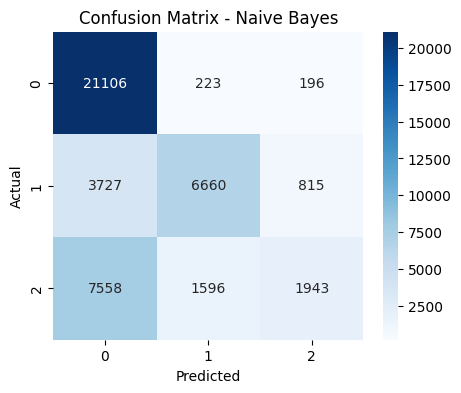


===== Logistic Regression =====
Accuracy: 0.8246166484118291

Classification Report:

              precision    recall  f1-score   support

         bad       0.87      0.94      0.91     21525
        good       0.82      0.80      0.81     11202
     neutral       0.72      0.62      0.67     11097

    accuracy                           0.82     43824
   macro avg       0.80      0.79      0.79     43824
weighted avg       0.82      0.82      0.82     43824



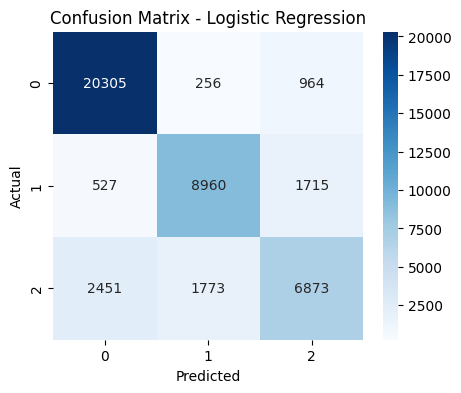


===== SVM =====
Accuracy: 0.8183415480102227

Classification Report:

              precision    recall  f1-score   support

         bad       0.87      0.95      0.91     21525
        good       0.78      0.83      0.80     11202
     neutral       0.73      0.55      0.62     11097

    accuracy                           0.82     43824
   macro avg       0.79      0.78      0.78     43824
weighted avg       0.81      0.82      0.81     43824



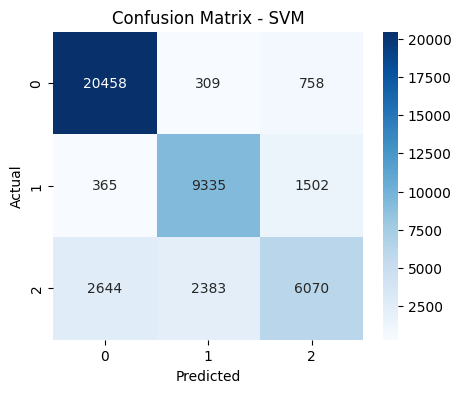

In [19]:
evaluate_model("Naive Bayes", y_test, y_pred_nb)
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("SVM", y_test, y_pred_svm)

In [20]:
model_comparison = {
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

for model, acc in model_comparison.items():
    print(f"{model}: {acc:.4f}")


Naive Bayes: 0.6779
Logistic Regression: 0.8246
SVM: 0.8183


Three machine learning models—Naive Bayes, Logistic Regression, and Support Vector Machine—were trained and evaluated using TF-IDF features. Logistic Regression achieved the highest accuracy of 82.46%, followed closely by SVM at 81.83%. Naive Bayes showed comparatively lower performance at 67.79%. Based on these results, Logistic Regression was chosen as the final sentiment classification model.